In [1]:
from sklearn.datasets import load_boston, load_breast_cancer, load_iris, fetch_lfw_people

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import losses
from sklearn.pipeline import Pipeline

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.
/Users/ajinthchristudas/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/ajinthchristudas/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Breast Cancer Classification

In [2]:
data = load_breast_cancer()

# Invert the Data

In [3]:
target = data.target* -1 + 1  

In [4]:
X = data.data
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

ss = StandardScaler()
ss_fit = ss.fit(X_train)

X_train = ss_fit.transform(X_train)
X_test = ss_fit.transform(X_test)

In [6]:
def model_funk():
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [7]:
ff_model = KerasClassifier(build_fn=model_funk, epochs=10, verbose=0)

params = {
    'epochs': [10]
} 
gs = GridSearchCV(ff_model, param_grid=params)
gs.fit(X_train, y_train)
print (gs.best_score_)
print (gs.best_params_)

0.942857142464
{'epochs': 10}


# Pure Function and Grid Search 

In [8]:
def model_funk(input_dim=30, layer_one_neurons=30,layer_two_neurons=18, layer_three_neurons=8):
    model = Sequential()
    
    model.add(Dense(layer_one_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(layer_three_neurons, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model




ff_model = KerasClassifier(build_fn=model_funk, verbose=0, input_dim=X_train.shape[1])

params = {
    'epochs': [10], 
    'batch_size': [50],
    'layer_one_neurons': [30], 
    'layer_two_neurons': [18],
    'layer_three_neurons': [6,8,12]
}

gs = GridSearchCV(ff_model, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.95164834536
{'batch_size': 50, 'epochs': 10, 'layer_one_neurons': 30, 'layer_three_neurons': 12, 'layer_two_neurons': 18}


# Pipeline 

In [9]:
def model_funk(input_dim=30, layer_one_neurons=30, layer_two_neurons=20):
    model = Sequential()
    model.add(Dense(layer_one_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model




ff_model = KerasClassifier(build_fn=model_funk, verbose=0, input_dim=X_train.shape[1])


pipe = Pipeline([
    ('ss', StandardScaler()),
    ('ff_model', ff_model)
])


params = {
    'ff_model__epochs': [5],
    'ff_model__batch_size': [50],
    'ff_model__layer_one_neurons': [20, 30],
    'ff_model__layer_two_neurons': [30, 50]
}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.940659331751
{'ff_model__batch_size': 50, 'ff_model__epochs': 5, 'ff_model__layer_one_neurons': 20, 'ff_model__layer_two_neurons': 50}


In [10]:
gs.score(X_test, y_test)

0.92105262739616522

# CNN 

In [11]:
data= fetch_lfw_people(min_faces_per_person=70)

y = to_categorical(data.target)
X = data.data

X_train, X_test, y_train, y_test = train_test_split(data.data, y )

X_train = X_train.reshape(X_train.shape[0],62,47,1)
X_test = X_test.reshape(X_test.shape[0],62,47,1)

X_train = X_train/255.
X_test = X_test/255.

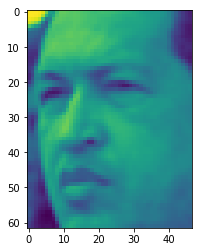

In [12]:
plt.imshow(data.images[0])

In [13]:
model = Sequential()
model.add(Conv2D(15, (5, 5), input_shape=(62, 47, 1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(30, (4,4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 966 samples, validate on 322 samples
Epoch 1/5
966/966 [==============================] - 3s 3ms/step - loss: 1.7095 - acc: 0.3996 - val_loss: 1.6612 - val_acc: 0.4037
Epoch 2/5
966/966 [==============================] - 2s 2ms/step - loss: 1.6426 - acc: 0.4161 - val_loss: 1.6179 - val_acc: 0.4037
Epoch 3/5
966/966 [==============================] - 2s 2ms/step - loss: 1.5606 - acc: 0.4337 - val_loss: 1.4663 - val_acc: 0.4720
Epoch 4/5
966/966 [==============================] - 2s 2ms/step - loss: 1.3660 - acc: 0.5259 - val_loss: 1.3031 - val_acc: 0.5155
Epoch 5/5
966/966 [==============================] - 2s 2ms/step - loss: 1.1319 - acc: 0.5828 - val_loss: 1.0968 - val_acc: 0.6366
